## Ujian Tengah Semester - Natural Language Programming

- Nama: Irfan Saputra Nasution
- NIM : 210401107
- Dosen Pengampu : Taslim, M.Kom, MTA, MCF


## **Tahap 1: Data Preprocessing**

### **1. Eksplorasi Data**

#### 1.1 Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from gensim.models import Word2Vec
from google.colab import drive
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import words
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Download NLTK stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
nltk.download('words')
word_list = set(words.words())

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


#### 1.2 Import Data

In [ ]:
# Mount Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Phishing_Email.csv')

#### 1.3 Memahami Struktur Dataset

In [ ]:
df.head(20) # Menampilkan 20 dataset pertama

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email
5,5,global risk management operations sally congra...,Safe Email
6,6,"On Sun, Aug 11, 2002 at 11:17:47AM +0100, wint...",Safe Email
7,7,"entourage , stockmogul newsletter ralph velez ...",Phishing Email
8,8,"we owe you lots of money dear applicant , afte...",Phishing Email
9,9,re : coastal deal - with exxon participation u...,Safe Email


In [ ]:
# Tampilkan informasi umum tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18650 non-null  int64 
 1   Email Text  18634 non-null  object
 2   Email Type  18650 non-null  object
dtypes: int64(1), object(2)
memory usage: 437.2+ KB


In [ ]:
# Mengubah Tipe Data
df['Email Text'] = df['Email Text'].astype("string")
df['Email Type'] = df['Email Type'].astype("string")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18650 non-null  int64 
 1   Email Text  18634 non-null  string
 2   Email Type  18650 non-null  string
dtypes: int64(1), string(2)
memory usage: 437.2 KB


#### 1.4 Menangani Missing Value, Data Null, Duplicated

In [ ]:
# Pengecekan Duplicated
df.duplicated().sum()

0

In [ ]:
# Pengecekan Data Null (Kosong)
df.isnull().sum()

,0
Unnamed: 0,0
Email Text,16
Email Type,0


In [ ]:
# Hapus Null
df = df.dropna()
df.isnull().sum()

,0
Unnamed: 0,0
Email Text,0
Email Type,0


#### 1.5 Analisis Distribusi Data

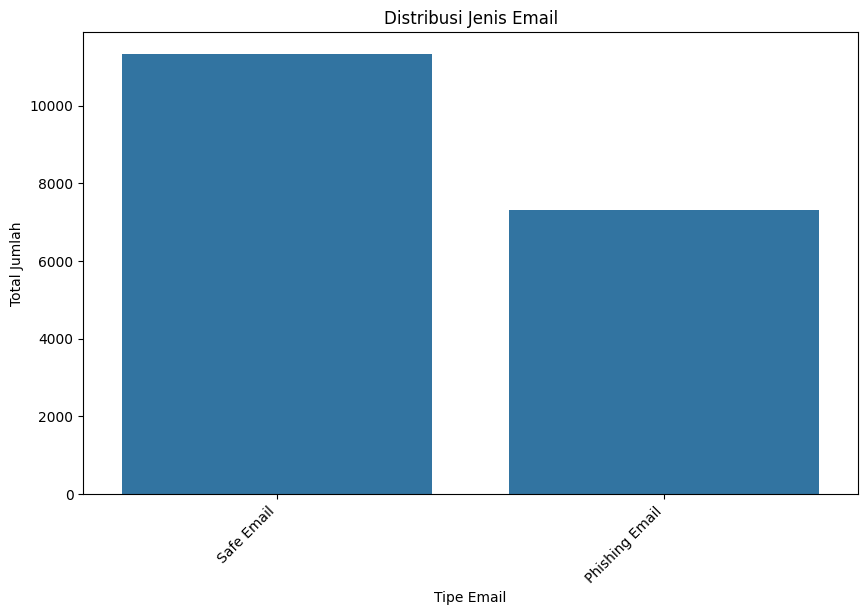

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Email Type', data=df)
plt.title('Distribusi Jenis Email')
plt.xlabel('Tipe Email')
plt.ylabel('Total Jumlah')
plt.xticks(rotation=45, ha='right')
plt.show()

### **2. Proses Pembersihan**

#### 2.1 Pembersihan Teks

In [ ]:
# Perubahan teks menjadi kecil
def lowercase(review_text):
    low = review_text.lower()
    return low

df['clean_content'] = df['Email Text'].apply(lambda low:lowercase(str(low)))

In [ ]:
# Menghapus URL
def clean_url(review_text):
  return re.sub(r'http\S+', '', review_text)
df['clean_content'] = df['clean_content'].apply(lambda url:clean_url(str(url)))

In [ ]:
# Menghapus Angka dan Tanda Baca
def clean_non_alphanumeric(review_text):
  return re.sub('[^a-zA-Z]', ' ', review_text)
df['clean_content'] = df['clean_content'].apply(clean_non_alphanumeric)

In [ ]:
# Menghapus mention
def mention_remove(review_text):
  return re.sub(r"@\w+", "", review_text)
df['clean_content'] = df['clean_content'].apply(mention_remove)

In [ ]:
# Menghapus Hastags
def hashtag_remove(review_text):
  return re.sub(r"#\w+", "", review_text)
df['clean_content'] = df['clean_content'].apply(hashtag_remove)

In [ ]:
# Remove word repetition
def word_repetition(review_text):
  review = re.sub(r'(.)\1+', r'\1\1', review_text)
  return review

df['clean_content'] = df['clean_content'].apply(lambda word: word_repetition(word))

In [ ]:
# Menghapus WhiteSpace Huruf
def remove_whitespace_LT(review_text):
  return review_text.strip()
df['clean_content'] = df['clean_content'].apply(remove_whitespace_LT)

#### 2.2 Stopword Removal

In [ ]:
# Check List Stopword Removal
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# Melakukan Stopword Removal
stop_words = set(stopwords.words('english'))
def clean_stopwords(review_teks):
  review = ' '.join([word for word in review_teks.split() if word not in stop_words])
  return review
df['clean_content'] = df['clean_content'].apply(clean_stopwords)

#### 2.3 Lemmatization

In [ ]:
# Mengunduh NLTK Lemmatization
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Melakukan Lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatization(review_text):
  review = ' '.join([lemmatizer.lemmatize(word) for word in review_text.split()])
  return review
df['clean_content'] = df['clean_content'].apply(lemmatization)

#### 2.4 Stemming

In [ ]:
from nltk.stem import PorterStemmer

# Melakukan Stemming
stemmer = PorterStemmer()
def stemming(review_text):
    review = ' '.join([stemmer.stem(word) for word in review_text.split()])
    return review

df['clean_content'] = df['clean_content'].apply(stemming)

#### 2.5 Hasil Pembersihan Teks

In [ ]:
# Hasil Pembersihan (Menampilkan 20 Data)
df.head(20)

,Unnamed: 0,Email Text,Email Type,clean_content
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email,disc uniformitarian sex lang dick hudson obser...
1,1,the other side of * galicismos * * galicismo *...,Safe Email,side galicismo galicismo spanish term name imp...
2,2,re : equistar deal tickets are you still avail...,Safe Email,equistar deal ticket still avail assist robert...
3,3,Hello I am your hot lil horny toy. I am t...,Phishing Email,hello hot lil horni toy one dream open mind pe...
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email,softwar incred low price lower draperi sevente...
5,5,global risk management operations sally congra...,Safe Email,global risk manag oper salli congratul new rol...
6,6,"On Sun, Aug 11, 2002 at 11:17:47AM +0100, wint...",Safe Email,sun aug wintermut mention impress get read lkm...
7,7,"entourage , stockmogul newsletter ralph velez ...",Phishing Email,entourag stockmogul newslett ralph velez genex...
8,8,"we owe you lots of money dear applicant , afte...",Phishing Email,owe lot money dear applic review upon receiv a...
9,9,re : coastal deal - with exxon participation u...,Safe Email,coastal deal exxon particip project agreement ...


## **Tahap 2: Representasi Teks**

In [ ]:
# Tokenisasi
from gensim.utils import tokenize
df["tokenize_text"] = df.clean_content.apply(lambda x: list(tokenize(x)))

df.head(20)

,Unnamed: 0,Email Text,Email Type,clean_content,tokenize_text
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email,disc uniformitarian sex lang dick hudson obser...,"[disc, uniformitarian, sex, lang, dick, hudson..."
1,1,the other side of * galicismos * * galicismo *...,Safe Email,side galicismo galicismo spanish term name imp...,"[side, galicismo, galicismo, spanish, term, na..."
2,2,re : equistar deal tickets are you still avail...,Safe Email,equistar deal ticket still avail assist robert...,"[equistar, deal, ticket, still, avail, assist,..."
3,3,Hello I am your hot lil horny toy. I am t...,Phishing Email,hello hot lil horni toy one dream open mind pe...,"[hello, hot, lil, horni, toy, one, dream, open..."
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email,softwar incred low price lower draperi sevente...,"[softwar, incred, low, price, lower, draperi, ..."
5,5,global risk management operations sally congra...,Safe Email,global risk manag oper salli congratul new rol...,"[global, risk, manag, oper, salli, congratul, ..."
6,6,"On Sun, Aug 11, 2002 at 11:17:47AM +0100, wint...",Safe Email,sun aug wintermut mention impress get read lkm...,"[sun, aug, wintermut, mention, impress, get, r..."
7,7,"entourage , stockmogul newsletter ralph velez ...",Phishing Email,entourag stockmogul newslett ralph velez genex...,"[entourag, stockmogul, newslett, ralph, velez,..."
8,8,"we owe you lots of money dear applicant , afte...",Phishing Email,owe lot money dear applic review upon receiv a...,"[owe, lot, money, dear, applic, review, upon, ..."
9,9,re : coastal deal - with exxon participation u...,Safe Email,coastal deal exxon particip project agreement ...,"[coastal, deal, exxon, particip, project, agre..."


### **3. Text Vectorization**

#### 3.1 Word2Vec

In [ ]:
# Download the 'punkt_tab' data package
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from gensim.models import Word2Vec

# define the model
model_wikihow = Word2Vec(
    window=10,
    min_count=5,
    workers=4,
    epochs=10,
)

In [ ]:
model_wikihow.build_vocab(df.tokenize_text, progress_per=1000)

# train the model
model_wikihow.train(df.tokenize_text, total_examples=model_wikihow.corpus_count, epochs=model_wikihow.epochs)

model_wikihow_path = r'/content/drive/MyDrive/Dataset/word2vec.model'

# save the model
model_wikihow.save(model_wikihow_path)

# load the model
model_wikihow = Word2Vec.load(model_wikihow_path)

In [ ]:
model_wikihow.wv.most_similar("syntax")

[('morpholog', 0.7963241338729858),
 ('phonolog', 0.7613644003868103),
 ('syntact', 0.7576550245285034),
 ('semant', 0.744854211807251),
 ('pragmat', 0.7181645035743713),
 ('grammar', 0.7094539999961853),
 ('zubizarreta', 0.6812353730201721),
 ('diachron', 0.680860161781311),
 ('predic', 0.6787002086639404),
 ('typolog', 0.6753910183906555)]

#### 3.2 Visualisasi Word2Vec dengan PCA

In [ ]:
words = ['test', 'portfolio', 'date', 'make', 'attribut', 'son', 'like', 'side',
        'slice', 'ticket', 'deal', 'assist', 'one', 'dream', 'so',
         'equistar' , 'low' , 'beg' , 'still', 'avail' , 'begin', 'robert' ,
         'enter' , 'new' , 'who', 'disciplin' , 'forward' , 'talk' , 'bryan' , 'hull' ,
         'anita' , 'luong']

In [ ]:
# Store the words vector in list
word_vector = []

for word in words:
  word_vector.append(model_wikihow.wv.get_vector(word))

word_vector[0]

array([ 0.9054907 ,  1.3172671 ,  0.8966317 ,  2.4070523 ,  1.2406932 ,
        1.3756161 , -0.38732448, -2.7637877 ,  0.33086684, -0.89455456,
       -0.50927603,  1.2567075 , -2.2706852 , -1.7725469 , -0.49892497,
       -1.6469692 ,  0.02918161, -3.0339024 , -2.8957164 ,  0.33050734,
        1.1951823 ,  3.5748127 , -0.20060444,  1.1357499 ,  1.3429818 ,
       -2.0925927 , -0.36917895, -0.5294947 ,  0.83365285,  1.8774296 ,
       -3.777386  , -0.26501122, -0.4147127 , -0.5408409 , -3.2998233 ,
       -0.18389316, -0.5061582 ,  1.2768813 ,  2.263904  , -0.37583083,
       -4.051732  ,  0.02669591, -1.9864773 , -1.5921726 ,  1.6493679 ,
       -0.27030343,  0.13111965, -0.8064949 ,  2.9757679 ,  2.939874  ,
       -2.4920409 ,  2.35082   , -0.48342153, -0.1708726 , -2.1180706 ,
       -3.7354605 ,  1.3500566 , -2.4322715 ,  0.7456861 ,  1.3602909 ,
        0.60835916,  1.4452922 ,  0.09989337, -1.9239398 ,  0.17580613,
        0.6760006 ,  2.4339309 , -1.7680818 ,  2.1266692 , -0.48

In [ ]:
from sklearn.decomposition import PCA

# transforming words vector
pca = PCA(n_components=2)
result = pca.fit_transform(word_vector)

In [ ]:
import plotly.express as px

# Create the scatter plot
fig = px.scatter(x=result[:, 0], y=result[:, 1])

# Annotate each data point
for i, txt in enumerate(words):
    fig.add_annotation(
        x=result[i, 0],
        y=result[i, 1],
        text=txt,
        xref="x",
        yref="y",
        showarrow=True,
        arrowhead=7,
        ax=20,
        ay=-30
    )

# adjust graph size
fig.update_layout(
    height=1200,
    width=1200,
    title='Visualisasi Kata-kata Bahasa Inggris'
)

# Show the plot
fig.show()

## **Tahap 3: Pemodelan Klasifikasi**

### **4. Model Klasifikasi**

In [ ]:
def vectorize_text(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

In [ ]:
X = np.array([vectorize_text(text, model_wikihow) for text in df.tokenize_text])

In [ ]:
# Melakukan Label Encoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Email Type'])

In [ ]:
# Pembagian Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def summarize_data_split(X_train, X_test, y_train, y_test):
  print("Training:", X_train.shape)
  print("Testing:", y_test.shape)

summarize_data_split(X_train, X_test, y_train, y_test)

Training: (14907, 100)
Testing: (3727,)


#### 4.1 Pembuatan Model KNN dengan Word2Vec

In [ ]:
def train_knn_models(X_train, y_train, k_values):
    knn_models = []
    for k in k_values:
        # Melatih KNN dengan nilai k tertentu
        knn_classifier = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='minkowski')
        knn_classifier.fit(X_train, y_train)
        knn_models.append((f'KNN (k={k})', knn_classifier))  # Menyimpan model dan nilai k-nya
    return knn_models

# Melatih model KNN untuk berbagai nilai k
k_values = [3, 5]
knn_models = train_knn_models(X_train, y_train, k_values)

#### 4.2 Evaluasi Model KNN dengan Word2Vec

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import pandas as pd

# Fungsi untuk mengevaluasi model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    # Pastikan label yang ada di y_test yang digunakan dalam confusion_matrix
    labels = np.unique(y_test)

    cm = confusion_matrix(y_test, y_pred, labels=labels)
    tn, fp, fn, tp = cm.ravel()

    # Hitung precision secara manual
    precision_manual = tp / (tp + fp) if (tp + fp) != 0 else 0

    # Mengembalikan hasil evaluasi metrik
    return {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_manual,  # Precision manual
        'Recall': recall_score(y_test, y_pred, pos_label=labels[1]),
        'F1-Score': f1_score(y_test, y_pred, pos_label=labels[1])
    }

# Fungsi untuk mengevaluasi model KNN yang sudah dilatih
def evaluate_knn_models(knn_models, X_test, y_test):
    knn_results = []
    for model_name, model in knn_models:
        metrics = evaluate_model(model, X_test, y_test)
        knn_results.append({
            'Model': model_name,
            'Accuracy': metrics['Accuracy'],
            'Precision': metrics['Precision'],  # Precision manual
            'Recall': metrics['Recall'],
            'F1-Score': metrics['F1-Score']
        })
    return knn_results

# Mengevaluasi model yang sudah dilatih
knn_results = evaluate_knn_models(knn_models, X_test, y_test)

# Buat DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(knn_results)

# Tampilkan hasil
print(summary_df)

       Model  Accuracy  Precision    Recall  F1-Score
0  KNN (k=3)  0.960021   0.971180  0.961068  0.966098
1  KNN (k=5)  0.962168   0.971715  0.964237  0.967962


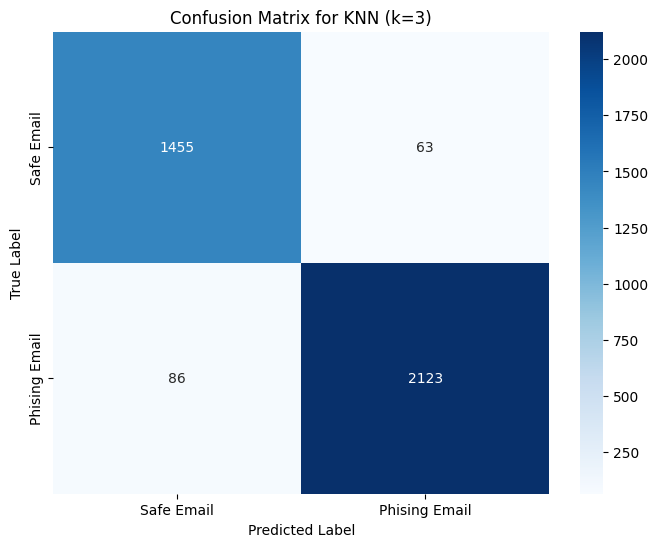

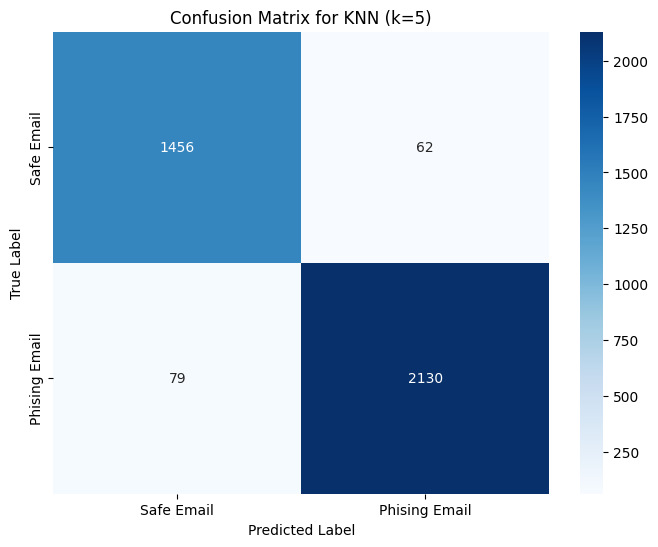

In [ ]:
def plot_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Safe Email', 'Phising Email'],
                yticklabels=['Safe Email', 'Phising Email'])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()


for model_name, model in knn_models:
    plot_confusion_matrix(model, X_test, y_test)

#### 4.3 Pembuatan Model Naive Bayes dengan Word2Vec

In [ ]:
# Evaluasi Naive Bayes
nb_results = []

# Inisialisasi Naive Bayes (GaussianNB)
nb_classifier = GaussianNB(var_smoothing=1e-9)

# Convert X_train and X_test to dense arrays
X_train_dense = X_train  # Assuming X_train is a sparse matrix
X_test_dense = X_test   # Assuming X_test is a sparse matrix

# Melatih model Naive Bayes
nb_classifier.fit(X_train_dense, y_train)

# Menghitung metrik evaluasi
metrics = evaluate_model(nb_classifier, X_test_dense, y_test)

#### 4.4 Evaluasi Model Naive Bayes dengan Word2Vec

In [ ]:
# Fungsi untuk mengevaluasi model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    # Pastikan label yang ada di y_test yang digunakan dalam confusion_matrix
    labels = np.unique(y_test)  # Menyesuaikan label dengan yang ada di y_test

    cm = confusion_matrix(y_test, y_pred, labels=labels)
    tn, fp, fn, tp = cm.ravel()

    return {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, pos_label=labels[1]),
        'Recall': recall_score(y_test, y_pred, pos_label=labels[1]),
        'F1-Score': f1_score(y_test, y_pred, pos_label=labels[1])
    }

# Menyimpan hasil evaluasi
nb_results.append({
    'Model': 'Naive Bayes',
    'Accuracy': metrics['Accuracy'],
    'Precision': metrics['Precision'],
    'Recall': metrics['Recall'],
    'F1-Score': metrics['F1-Score']
})

# Buat DataFrame untuk meringkas hasil Naive Bayes
nb_summary_df = pd.DataFrame(nb_results)

# Tampilkan hasil
print(nb_summary_df)

         Model  Accuracy  Precision    Recall  F1-Score
0  Naive Bayes  0.904213   0.928307  0.908556  0.918325


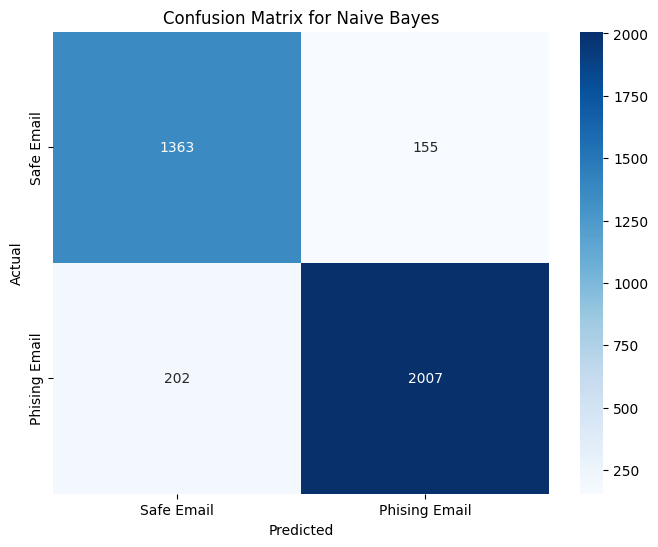

In [ ]:
y_pred_nb = nb_classifier.predict(X_test_dense)

# Calculate the confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", # Changed cm to cm_nb
                xticklabels=['Safe Email', 'Phising Email'],
                yticklabels=['Safe Email', 'Phising Email'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()